## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9641389	total: 58.5ms	remaining: 58.5s
1:	learn: 0.9452521	total: 59.5ms	remaining: 29.7s
2:	learn: 0.9253900	total: 60.6ms	remaining: 20.1s
3:	learn: 0.9119408	total: 61.6ms	remaining: 15.3s
4:	learn: 0.8951881	total: 62.7ms	remaining: 12.5s
5:	learn: 0.8787511	total: 63.6ms	remaining: 10.5s
6:	learn: 0.8618945	total: 64.6ms	remaining: 9.16s
7:	learn: 0.8460014	total: 65.4ms	remaining: 8.11s
8:	learn: 0.8305786	total: 66.2ms	remaining: 7.29s
9:	learn: 0.8146299	total: 67ms	remaining: 6.63s
10:	learn: 0.7993871	total: 67.8ms	remaining: 6.1s
11:	learn: 0.7851547	total: 68.6ms	remaining: 5.65s
12:	learn: 0.7718859	total: 69.4ms	remaining: 5.27s
13:	learn: 0.7574130	total: 70.3ms	remaining: 4.95s
14:	learn: 0.7436977	total: 71.1ms	remaining: 4.67s
15:	learn: 0.7297834	total: 71.9ms	remaining: 4.42s
16:	learn: 0.7176914	total: 72.7ms	remaining: 4.2s
17:	learn: 0.7054828	total: 73.5ms	remaining: 4.01s
18:	learn: 0.6935911	total: 75.1ms	remaining: 3.

61:	learn: 0.4065683	total: 110ms	remaining: 1.66s
62:	learn: 0.4040279	total: 111ms	remaining: 1.65s
63:	learn: 0.4004156	total: 112ms	remaining: 1.63s
64:	learn: 0.3970630	total: 112ms	remaining: 1.62s
65:	learn: 0.3941863	total: 113ms	remaining: 1.6s
66:	learn: 0.3907873	total: 114ms	remaining: 1.59s
67:	learn: 0.3875850	total: 115ms	remaining: 1.57s
68:	learn: 0.3841119	total: 116ms	remaining: 1.56s
69:	learn: 0.3809704	total: 117ms	remaining: 1.55s
70:	learn: 0.3772000	total: 117ms	remaining: 1.53s
71:	learn: 0.3739155	total: 118ms	remaining: 1.52s
72:	learn: 0.3709877	total: 119ms	remaining: 1.51s
73:	learn: 0.3681681	total: 120ms	remaining: 1.5s
74:	learn: 0.3654402	total: 121ms	remaining: 1.49s
75:	learn: 0.3624626	total: 122ms	remaining: 1.48s
76:	learn: 0.3601747	total: 122ms	remaining: 1.47s
77:	learn: 0.3572093	total: 123ms	remaining: 1.46s
78:	learn: 0.3546259	total: 124ms	remaining: 1.45s
79:	learn: 0.3524791	total: 125ms	remaining: 1.44s
80:	learn: 0.3504104	total: 126ms

160:	learn: 0.2456255	total: 193ms	remaining: 1s
161:	learn: 0.2450978	total: 193ms	remaining: 1s
162:	learn: 0.2446487	total: 194ms	remaining: 998ms
163:	learn: 0.2439912	total: 195ms	remaining: 995ms
164:	learn: 0.2434903	total: 196ms	remaining: 992ms
165:	learn: 0.2427850	total: 197ms	remaining: 989ms
166:	learn: 0.2419319	total: 198ms	remaining: 986ms
167:	learn: 0.2412305	total: 198ms	remaining: 983ms
168:	learn: 0.2405627	total: 199ms	remaining: 980ms
169:	learn: 0.2399020	total: 200ms	remaining: 977ms
170:	learn: 0.2392893	total: 201ms	remaining: 974ms
171:	learn: 0.2388227	total: 202ms	remaining: 971ms
172:	learn: 0.2381637	total: 203ms	remaining: 968ms
173:	learn: 0.2375379	total: 203ms	remaining: 965ms
174:	learn: 0.2367566	total: 204ms	remaining: 963ms
175:	learn: 0.2361851	total: 205ms	remaining: 960ms
176:	learn: 0.2352073	total: 206ms	remaining: 957ms
177:	learn: 0.2346133	total: 207ms	remaining: 955ms
178:	learn: 0.2338623	total: 208ms	remaining: 953ms
179:	learn: 0.2332

286:	learn: 0.1820961	total: 300ms	remaining: 745ms
287:	learn: 0.1816700	total: 301ms	remaining: 743ms
288:	learn: 0.1813852	total: 302ms	remaining: 742ms
289:	learn: 0.1810100	total: 302ms	remaining: 740ms
290:	learn: 0.1806645	total: 303ms	remaining: 738ms
291:	learn: 0.1802147	total: 304ms	remaining: 737ms
292:	learn: 0.1799827	total: 305ms	remaining: 735ms
293:	learn: 0.1795602	total: 306ms	remaining: 734ms
294:	learn: 0.1793077	total: 306ms	remaining: 732ms
295:	learn: 0.1791220	total: 307ms	remaining: 731ms
296:	learn: 0.1787827	total: 308ms	remaining: 729ms
297:	learn: 0.1782687	total: 309ms	remaining: 728ms
298:	learn: 0.1779501	total: 310ms	remaining: 726ms
299:	learn: 0.1774473	total: 311ms	remaining: 725ms
300:	learn: 0.1770921	total: 312ms	remaining: 723ms
301:	learn: 0.1767285	total: 312ms	remaining: 722ms
302:	learn: 0.1766154	total: 313ms	remaining: 721ms
303:	learn: 0.1764077	total: 314ms	remaining: 719ms
304:	learn: 0.1761061	total: 315ms	remaining: 718ms
305:	learn: 

387:	learn: 0.1510586	total: 383ms	remaining: 604ms
388:	learn: 0.1506595	total: 384ms	remaining: 603ms
389:	learn: 0.1503675	total: 385ms	remaining: 602ms
390:	learn: 0.1498790	total: 386ms	remaining: 601ms
391:	learn: 0.1497299	total: 386ms	remaining: 599ms
392:	learn: 0.1494999	total: 387ms	remaining: 598ms
393:	learn: 0.1490840	total: 388ms	remaining: 597ms
394:	learn: 0.1487221	total: 389ms	remaining: 596ms
395:	learn: 0.1484475	total: 390ms	remaining: 595ms
396:	learn: 0.1480458	total: 391ms	remaining: 594ms
397:	learn: 0.1478247	total: 392ms	remaining: 593ms
398:	learn: 0.1475148	total: 393ms	remaining: 592ms
399:	learn: 0.1473032	total: 394ms	remaining: 591ms
400:	learn: 0.1470935	total: 395ms	remaining: 590ms
401:	learn: 0.1467767	total: 396ms	remaining: 589ms
402:	learn: 0.1465101	total: 397ms	remaining: 588ms
403:	learn: 0.1461973	total: 398ms	remaining: 587ms
404:	learn: 0.1458664	total: 399ms	remaining: 586ms
405:	learn: 0.1455773	total: 400ms	remaining: 585ms
406:	learn: 

512:	learn: 0.1209136	total: 490ms	remaining: 466ms
513:	learn: 0.1206559	total: 491ms	remaining: 465ms
514:	learn: 0.1204656	total: 492ms	remaining: 463ms
515:	learn: 0.1202594	total: 493ms	remaining: 462ms
516:	learn: 0.1199934	total: 494ms	remaining: 461ms
517:	learn: 0.1198460	total: 495ms	remaining: 460ms
518:	learn: 0.1196315	total: 495ms	remaining: 459ms
519:	learn: 0.1195152	total: 496ms	remaining: 458ms
520:	learn: 0.1192806	total: 497ms	remaining: 457ms
521:	learn: 0.1188606	total: 498ms	remaining: 456ms
522:	learn: 0.1187059	total: 499ms	remaining: 455ms
523:	learn: 0.1184625	total: 499ms	remaining: 454ms
524:	learn: 0.1184072	total: 500ms	remaining: 453ms
525:	learn: 0.1182606	total: 501ms	remaining: 452ms
526:	learn: 0.1181161	total: 502ms	remaining: 451ms
527:	learn: 0.1179554	total: 503ms	remaining: 450ms
528:	learn: 0.1177254	total: 504ms	remaining: 448ms
529:	learn: 0.1176667	total: 504ms	remaining: 447ms
530:	learn: 0.1174473	total: 505ms	remaining: 446ms
531:	learn: 

612:	learn: 0.1037721	total: 573ms	remaining: 362ms
613:	learn: 0.1035753	total: 574ms	remaining: 361ms
614:	learn: 0.1033933	total: 575ms	remaining: 360ms
615:	learn: 0.1032264	total: 576ms	remaining: 359ms
616:	learn: 0.1030666	total: 576ms	remaining: 358ms
617:	learn: 0.1029435	total: 577ms	remaining: 357ms
618:	learn: 0.1026205	total: 578ms	remaining: 356ms
619:	learn: 0.1024245	total: 579ms	remaining: 355ms
620:	learn: 0.1023386	total: 580ms	remaining: 354ms
621:	learn: 0.1021616	total: 581ms	remaining: 353ms
622:	learn: 0.1020934	total: 582ms	remaining: 352ms
623:	learn: 0.1019397	total: 582ms	remaining: 351ms
624:	learn: 0.1017589	total: 583ms	remaining: 350ms
625:	learn: 0.1015144	total: 584ms	remaining: 349ms
626:	learn: 0.1013756	total: 585ms	remaining: 348ms
627:	learn: 0.1011918	total: 586ms	remaining: 347ms
628:	learn: 0.1010830	total: 587ms	remaining: 346ms
629:	learn: 0.1009539	total: 587ms	remaining: 345ms
630:	learn: 0.1007907	total: 588ms	remaining: 344ms
631:	learn: 

740:	learn: 0.0853163	total: 680ms	remaining: 238ms
741:	learn: 0.0852904	total: 681ms	remaining: 237ms
742:	learn: 0.0851770	total: 682ms	remaining: 236ms
743:	learn: 0.0850538	total: 683ms	remaining: 235ms
744:	learn: 0.0849548	total: 684ms	remaining: 234ms
745:	learn: 0.0847786	total: 684ms	remaining: 233ms
746:	learn: 0.0847329	total: 685ms	remaining: 232ms
747:	learn: 0.0845433	total: 686ms	remaining: 231ms
748:	learn: 0.0844317	total: 687ms	remaining: 230ms
749:	learn: 0.0842282	total: 688ms	remaining: 229ms
750:	learn: 0.0841365	total: 688ms	remaining: 228ms
751:	learn: 0.0840914	total: 689ms	remaining: 227ms
752:	learn: 0.0839231	total: 690ms	remaining: 226ms
753:	learn: 0.0838101	total: 691ms	remaining: 225ms
754:	learn: 0.0836537	total: 692ms	remaining: 224ms
755:	learn: 0.0834988	total: 693ms	remaining: 224ms
756:	learn: 0.0834292	total: 694ms	remaining: 223ms
757:	learn: 0.0832826	total: 694ms	remaining: 222ms
758:	learn: 0.0831668	total: 695ms	remaining: 221ms
759:	learn: 

840:	learn: 0.0744098	total: 763ms	remaining: 144ms
841:	learn: 0.0742657	total: 764ms	remaining: 143ms
842:	learn: 0.0740651	total: 765ms	remaining: 142ms
843:	learn: 0.0739938	total: 766ms	remaining: 142ms
844:	learn: 0.0738847	total: 767ms	remaining: 141ms
845:	learn: 0.0737735	total: 768ms	remaining: 140ms
846:	learn: 0.0737109	total: 769ms	remaining: 139ms
847:	learn: 0.0736658	total: 769ms	remaining: 138ms
848:	learn: 0.0736236	total: 770ms	remaining: 137ms
849:	learn: 0.0734597	total: 771ms	remaining: 136ms
850:	learn: 0.0734177	total: 772ms	remaining: 135ms
851:	learn: 0.0732363	total: 773ms	remaining: 134ms
852:	learn: 0.0731531	total: 774ms	remaining: 133ms
853:	learn: 0.0731179	total: 775ms	remaining: 132ms
854:	learn: 0.0729841	total: 775ms	remaining: 131ms
855:	learn: 0.0728380	total: 776ms	remaining: 131ms
856:	learn: 0.0728025	total: 777ms	remaining: 130ms
857:	learn: 0.0726399	total: 778ms	remaining: 129ms
858:	learn: 0.0725673	total: 779ms	remaining: 128ms
859:	learn: 

969:	learn: 0.0638265	total: 871ms	remaining: 26.9ms
970:	learn: 0.0637977	total: 872ms	remaining: 26ms
971:	learn: 0.0637309	total: 872ms	remaining: 25.1ms
972:	learn: 0.0636463	total: 873ms	remaining: 24.2ms
973:	learn: 0.0635486	total: 874ms	remaining: 23.3ms
974:	learn: 0.0634693	total: 875ms	remaining: 22.4ms
975:	learn: 0.0633468	total: 875ms	remaining: 21.5ms
976:	learn: 0.0632171	total: 876ms	remaining: 20.6ms
977:	learn: 0.0631046	total: 878ms	remaining: 19.7ms
978:	learn: 0.0630786	total: 879ms	remaining: 18.8ms
979:	learn: 0.0630315	total: 879ms	remaining: 17.9ms
980:	learn: 0.0629484	total: 880ms	remaining: 17ms
981:	learn: 0.0628843	total: 881ms	remaining: 16.1ms
982:	learn: 0.0627672	total: 882ms	remaining: 15.2ms
983:	learn: 0.0627127	total: 883ms	remaining: 14.4ms
984:	learn: 0.0625608	total: 883ms	remaining: 13.5ms
985:	learn: 0.0624730	total: 884ms	remaining: 12.6ms
986:	learn: 0.0624275	total: 885ms	remaining: 11.7ms
987:	learn: 0.0624117	total: 886ms	remaining: 10.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

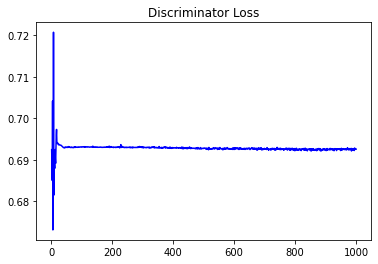

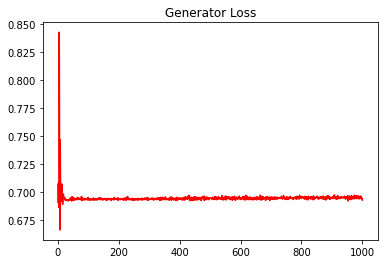

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1119081574935178


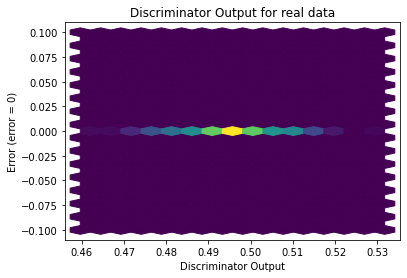

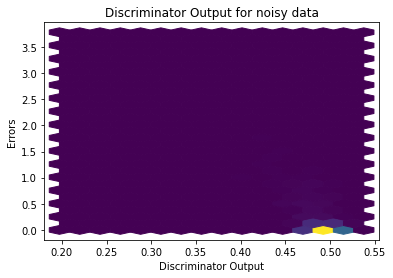

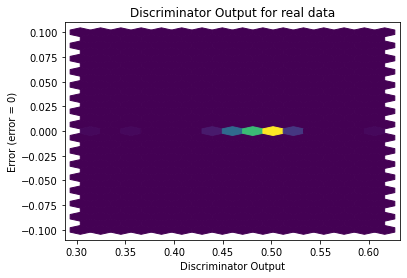

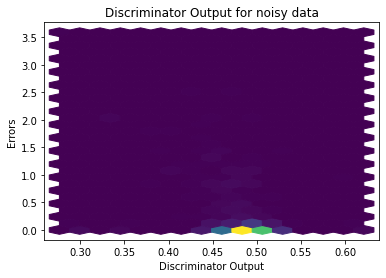

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


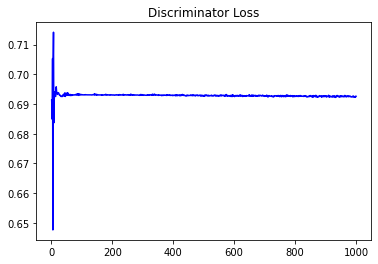

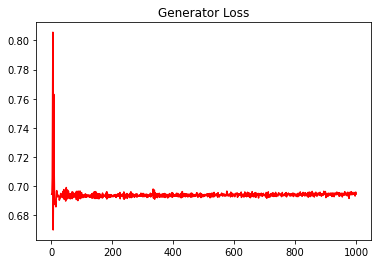

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10824358864760021


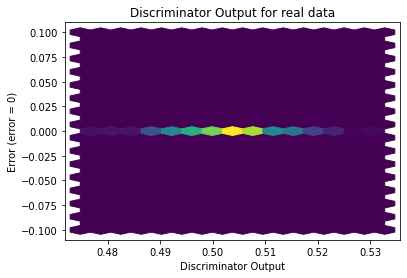

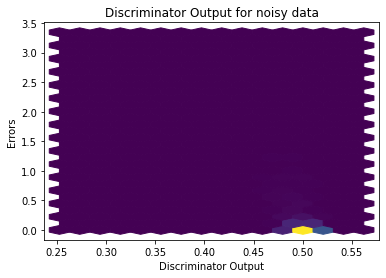

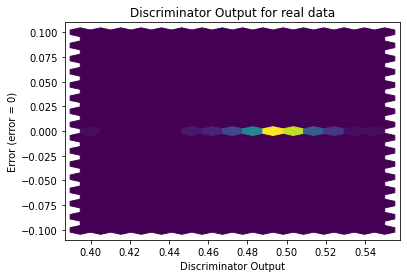

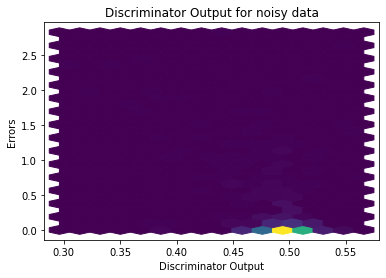

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4879]], requires_grad=True)
